# Linear Regression - 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


selling_price is our target variable. Remaining variables are our predictors.

### Univariate Linear Regression from scratch

Model and max_power has the maximum correlation with the data

In [3]:
X = df['max_power'].values  # to get the values only instead of a series
Y = df['selling_price'].values

In [4]:
X.shape, Y.shape # both are one dimensional numpy arrays

((19820,), (19820,))

#### Helper functions

In [5]:
# hypothesis function
def predict(x, w):
    # this calculation is for one sample, hence no dot product      
    # y_hat = w1.x + w0  --> hypothesis
    y_hat = w[1] * x + w[0]
    return y_hat

In [6]:
def error(X, Y, w):
    # for every sample, calculate the squared error and later take the average
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_hat = predict(X[i], w)
        total_error += (Y[i] - y_hat) ** 2
    return  total_error/m

In [7]:
# dL/dW - we will use all the samples for gradient calculation
def gradient(X, Y, w):
    m = X.shape[0]
    grad = np.zeros((2,))
    # SGD updates params based on gradient calculation of just one sample
    # Batch GD updates params based on gradient calculation of all the sample
    for i in range(m):
        y_hat = predict(X[i], w)
        grad[1] += - 2 * (Y[i] - y_hat) * X[i]
        grad[0] += - 2 * (Y[i] - y_hat)
    return grad/m

#### Training Process of LR - Gradient Descent

In [8]:
def gradient_descent(X, Y, epochs = 100, learning_rate = 0.1):
    w = np.zeros((2,))
    w_list, e_list = [], [] # This is just to log the intermediate e's and w's
    # run the loop 100 times
    for i in range(epochs):
        # Calculate the gradient
        grad = gradient(X, Y, w)
        # Keep updating the weights
        w[0] = w[0] - learning_rate * grad[0] 
        w[1] = w[1] - learning_rate * grad[1]
        # Store how the weight was getting update in every iteration
        w_list.append([w[0], w[1]])
        # Store how the error/L is changing in every iteration
        e_list.append(error(X, Y, w))
    return w, w_list, e_list

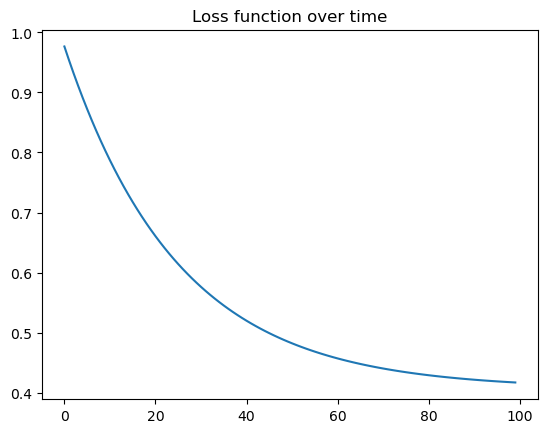

In [9]:
# too small of learning - takes too much time
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 0.01)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

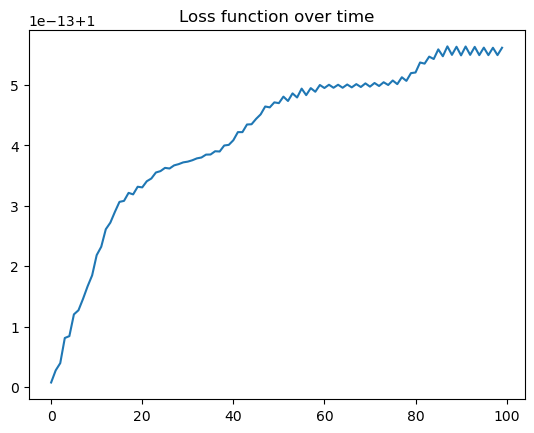

In [10]:
# too big of learning - never converges
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 1)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

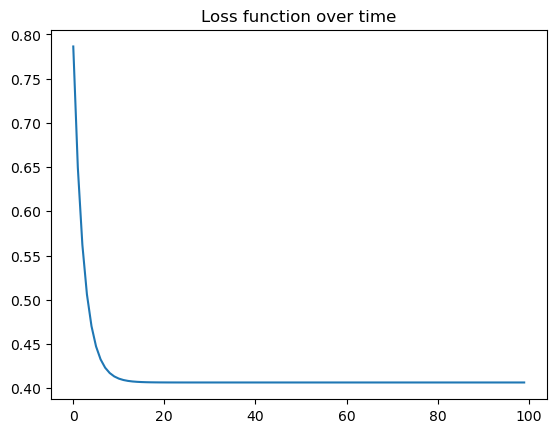

In [11]:
# perfect learning rate - converges quickly
w, w_list, e_list = gradient_descent(X, Y, epochs = 100, learning_rate = 0.1)
plt.plot(e_list)
plt.title("Loss function over time")
plt.show()

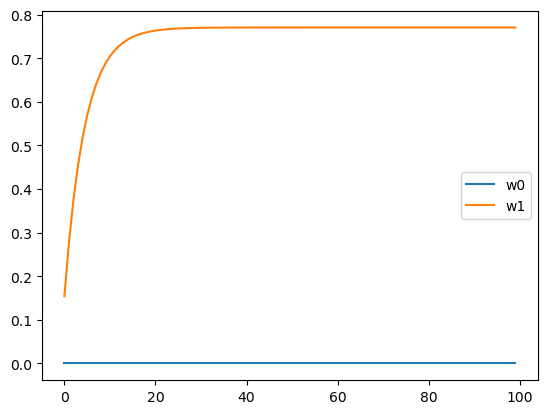

In [12]:
w_list = np.array(w_list)
plt.plot(w_list[:, 0], label = "w0") # Hence the model passes through origin, y intercept is zero.
plt.plot(w_list[:, 1], label = "w1")
plt.legend()
plt.show()

In [13]:
w

array([-1.55344960e-16,  7.70389854e-01])

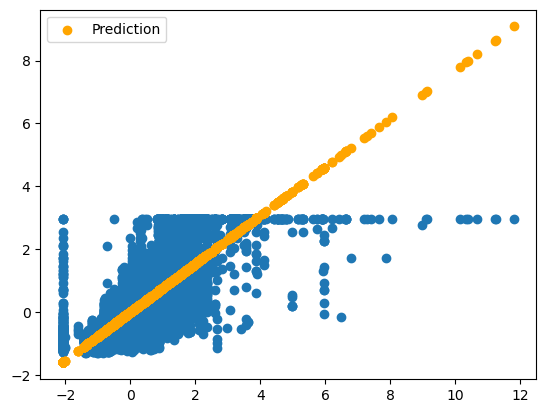

In [14]:
Y_hat = predict(X, w)
plt.scatter(X, Y)
plt.scatter(X, Y_hat, color = "orange", label = "Prediction")
plt.legend()
plt.show()

In [15]:
Y_hat

array([-0.89194167, -0.27749684, -0.31191952, ...,  0.09289119,
        0.72076087,  0.33522686])

The model that we have actually learned is a linear model which kind of is fair for the normal data, but for outliers, it is not working well.<br>This is because the actual relation is not linear.

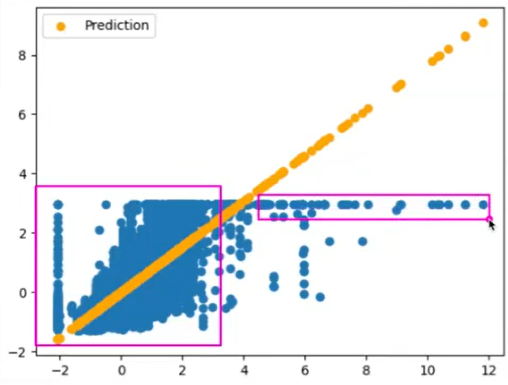

### Evaluation

1. Whether the model has even learnt something or not? Checking performance on Training Data itself
2. Once, we are sure that model has learnt something - we can check true performance of the model upon testing data

In [16]:
def r2_score(Y, Y_hat):
    num = np.sum((Y - Y_hat)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score

In [17]:
r2_score(Y, Y_hat) # this is still on training data
# That the univariate predictor "max power" is explaining 59% of the variability in the data

0.5935005280317714

In other words, around 59% of the variation in the dependent variable (Y) can be accounted for by the independent variable (Y_hat) in the given regression model.

It's worth noting that R-squared values range from 0 to 1, where 0 indicates that the independent variable does not explain any of the variability in the dependent variable, and 1 indicates a perfect fit where the independent variable explains all the variability. In this case, a score of 0.5935 suggests a moderate level of explanatory power for the "max power" predictor.

### Univariate Linear Regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression # we're importing LinearRegression class here from linear_model sub module

In [19]:
model = LinearRegression()
type(model) # type tells us that it's just a base model of Linear Regression, untrained

sklearn.linear_model._base.LinearRegression

In [20]:
model.coef_   # right now, it says that the model has no coefficients but once you train this model, it'll have certain coeff.

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [21]:
model.fit(X, Y)   # fit function trains the model upon data

ValueError: Expected 2D array, got 1D array instead:
array=[-1.15777962 -0.36020313 -0.40488529 ...  0.12057687  0.93557939
  0.43513924].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

On training the model, we get the error: `Expected 2D array, got 1D array instead`

In [22]:
X.shape, Y.shape    # it's 1D array

((19820,), (19820,))

Documentation gives us some ideas: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Parameters<br>
 |      ----------<br>
 |      X : {array-like, sparse matrix} of shape (n_samples, n_features)<br>
 |          Training data.<br>
 <br>
 Examples<br>
 |  --------<br>
 |  >>> import numpy as np<br>
 |  >>> from sklearn.linear_model import LinearRegression<br>
 |  >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])<br>

Problem: We only had 1 feature. So, we end up providing a 1-D array. Is it possible to convert it into a 2-D array?<br>
    Yes, we can add a dummy axis

`sklearn, irrespective of whether it is univariate or multivariate, it expects the data to be present in the shape n samples and n features`

In [23]:
X.shape, Y.shape

((19820,), (19820,))

In [24]:
X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)

In [25]:
X.shape, Y.shape

((19820, 1), (19820, 1))

In [26]:
model.fit(X, Y) # it has run a model

LinearRegression()

In [27]:
w1 = model.coef_ # w1, in case of multivariate, this becomes a list w1, w2, w3,....,wn

In [28]:
w0 = model.intercept_ # w0

In [29]:
w0, w1

(array([-1.56382574e-16]), array([[0.77038985]]))

w0 is close to zero and w1 is close to 0.77 which is quite similar to what we got during the scratch implementation above.

In [30]:
Y_hat = model.predict(X)

In [31]:
model.score(Y, Y_hat)

0.540779709149587

We'll discuss why it's not coming out to be .59

In [32]:
Y_hat # same as it was in scratch implementation

array([[-0.89194167],
       [-0.27749684],
       [-0.31191952],
       ...,
       [ 0.09289119],
       [ 0.72076087],
       [ 0.33522686]])

### Multivariate Linear Regression

In [33]:
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']

In [34]:
X.shape, Y.shape # Y is not a 2-D matrix, we need to reshape it

((19820, 17), (19820,))

In [35]:
type(X)  # Let's convert it into a numpy array

pandas.core.frame.DataFrame

In [36]:
X = X.to_numpy()
Y = Y.to_numpy()

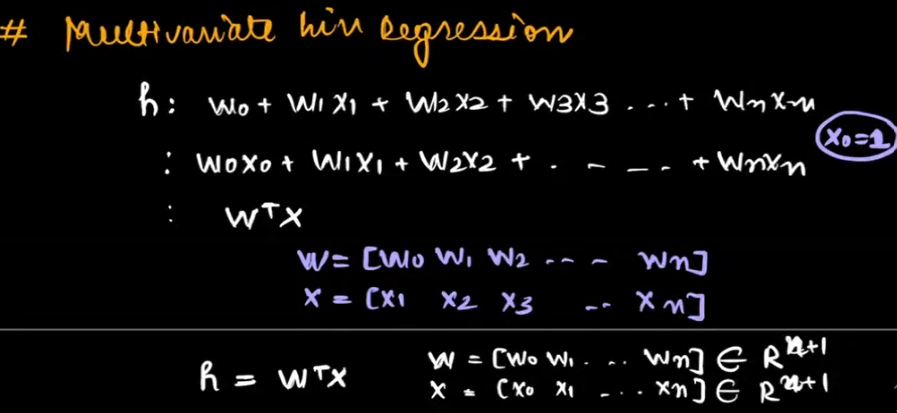

In [37]:
# Stack a column of 1s with X
ones = np.ones((X.shape[0], 1))  # 2D matrix defining a column of 1s
X = np.hstack((ones, X))
print(X.shape)  # it has changed from 17 to 18 features

(19820, 18)


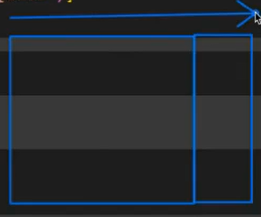

In [38]:
def hypothesis(X, weight): # same as predict for multivariate case
    return np.dot(X, weight)

In [39]:
# def error(X, Y, w):
#     # for every sample, calculate the squared error and later take the average
#     m = X.shape[0]
#     total_error = 0.0

#     for i in range(m):
#         y_hat = predict(X[i], w)
#         total_error += (Y[i] - y_hat) ** 2

#     return  total_error/m
# this function shall work
# can we write more optimized code? - 
# Earlier X was a list. Now, it's a matrix. Now, we can use vectorised features of numpy array.

In [40]:
def error(X, Y, w):
    # for every sample, calculate the squared error and later take the average
    m = X.shape[0]
    total_error = 0.0
    
    Y_hat = hypothesis(X, w)
    total_error = np.sum((Y - Y_hat) ** 2)/m
    
    return  total_error

In [43]:
def gradient(X, Y, w):
    # error will have the same shape as Y
    # grad = -2.E.X
    # X = (m, n+1)
    # E = (m,)
    # np.dot(X.T, E) --> (n+1, m) . (m,)
    # Output (grad) = (n+1,)
    m = X.shape[0]
    Y_hat = hypothesis(X, w)
    grad = 2 * np.dot(X.T, (Y_hat - Y))
    
    return grad/m

In [44]:
def gradient_descent(X, Y, epochs = 500, learning_rate = 0.1):
    n = X.shape[1]
    weight = np.zeros((n,))
    error_list = [] 
    
    for i in range(epochs):

        e = error(X, Y, weight)
        error_list.append(e)
        
        # Gradient descent
        grad = gradient(X, Y, weight)
        weight = weight - learning_rate * grad 
        
    return weight, error_list

In [45]:
weight, error_list = gradient_descent(X, Y)

In [46]:
weight

array([-6.43862136e-17,  6.49606223e-02, -1.82895655e-02, -4.83430286e-02,
        3.02408637e-02,  2.89670964e-02, -6.49606223e-02,  6.15011893e-02,
        7.92870481e-01, -1.69511557e-02, -3.43943374e-03,  1.56662107e-02,
        1.28017113e-02,  3.01544203e-03, -2.09812350e-02, -1.31123716e-02,
       -1.88085889e-02, -2.61485794e-02])

In [47]:
len(weight)

18

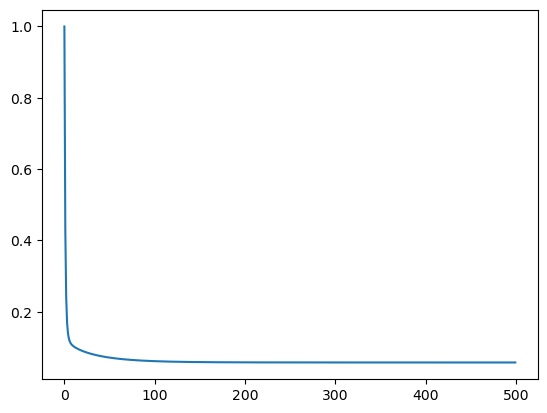

In [48]:
plt.plot(error_list)
plt.show()

The algorithm is converging even in less than 100 iterations. 

In [49]:
Y_hat = hypothesis(X, weight)

In [50]:
r2_score(Y, Y_hat)

0.9421852544960344

With multiple variables, we have increased our model's performance to .94

### sklearn code for multivariate use-case

In [64]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(X.shape, Y.shape)
model.fit(X, Y)
Y_hat = model.predict(X)
r2_score(Y, Y_hat)

(19820, 18) (19820,)


0.9421889572026914

But, we don't need to have an extra column of 1s. Hence,

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[df.columns.drop('selling_price')]
Y = df['selling_price']
X = X.to_numpy()
Y = Y.to_numpy()
print(X.shape, Y.shape)
model.fit(X, Y)    # no need to have that extra column of 1s for sklearn
Y_hat = model.predict(X)
r2_score(Y, Y_hat)

(19820, 17) (19820,)


0.9421889572026914

In [67]:
len(model.coef_)

17

In [68]:
model.intercept_

-6.33651685881033e-17

In [71]:
model.score(X, Y)  

0.9421889572026914

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/